<a href="https://colab.research.google.com/github/Pierre-Portfolio/GenerateBannerLogo/blob/main/GenerateBanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install Pillow requests

In [17]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont
import random

✅ Image finale générée : tech_wallpaper_final.png


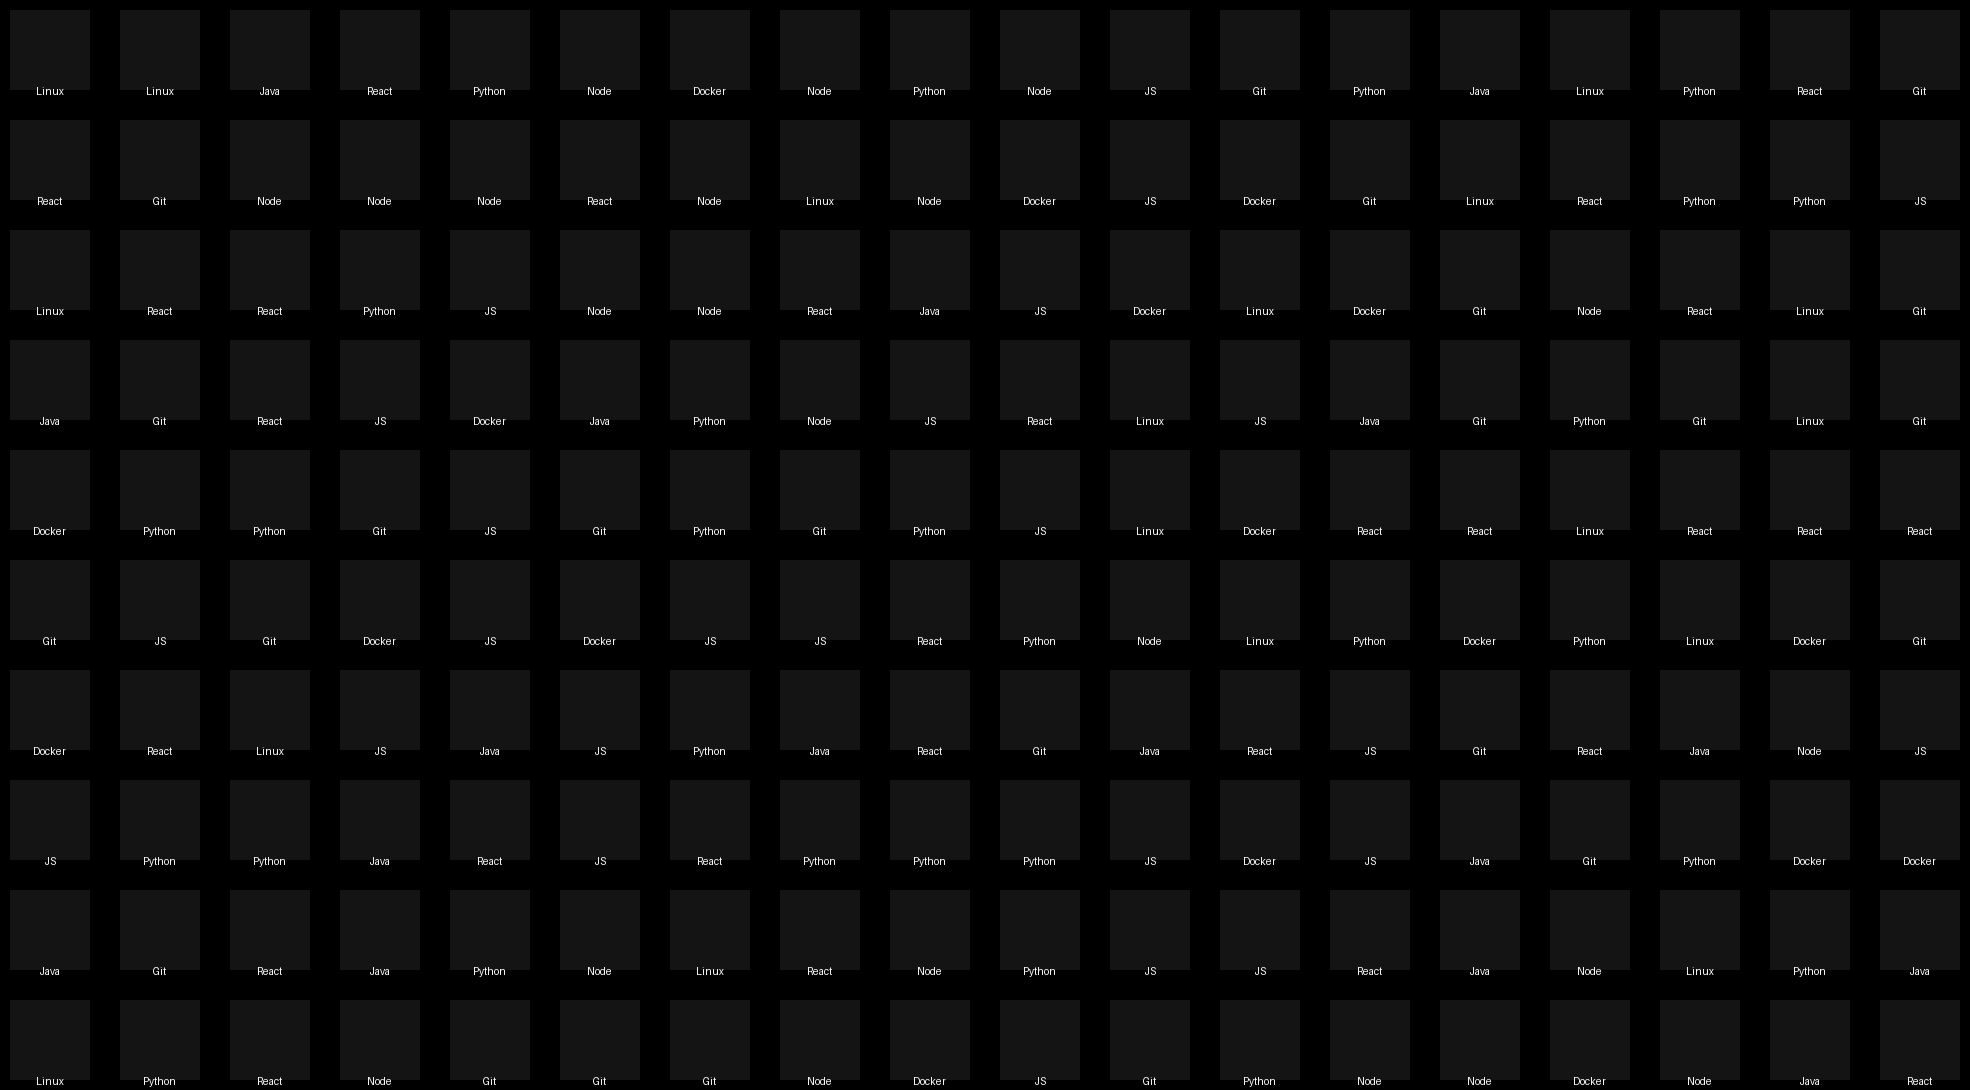

In [18]:
# Configuration de la session
session = requests.Session()
session.headers.update({
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
})

def download_image(url):
    try:
        response = session.get(url, timeout=10)
        response.raise_for_status()
        return Image.open(BytesIO(response.content)).convert("RGBA")
    except Exception as e:
        # Image de remplacement NOIRE (comme demandé)
        # J'utilise un gris très foncé (20,20,20) pour qu'on distingue encore un peu la case,
        # mais visuellement c'est noir sur fond noir.
        return Image.new('RGBA', (100, 100), (20, 20, 20, 255))

def create_tech_wallpaper(tools_data, rows=10, cols=18, box_size=100, gap=10, output_filename="tech_wallpaper_final.png"):
    """
    Version finale : Logo réduit (marge 10px), texte blanc bien visible, fond noir.
    """

    img_width = (cols * box_size) + ((cols - 1) * gap)
    img_height = (rows * box_size) + ((rows - 1) * gap)

    final_image = Image.new('RGB', (img_width, img_height), color=(0, 0, 0))
    draw = ImageDraw.Draw(final_image)

    try:
        font = ImageFont.truetype("arial.ttf", 12)
    except IOError:
        font = ImageFont.load_default()

    for i in range(rows * cols):
        item = random.choice(tools_data)
        name = item['key']
        url = item['content']

        col = i % cols
        row = i // cols

        x_offset = col * (box_size + gap)
        y_offset = row * (box_size + gap)

        # --- Paramètres de taille ---
        margin = 10  # Marge de 10px autour du logo
        # La taille max de l'icone = Taille case - (Marge * 2)
        # Donc pour une case de 100px, l'icone fera max 80px.
        max_icon_size = box_size - (margin * 2)

        img = download_image(url)
        # Redimensionner pour tenir dans l'espace max (80x80)
        img.thumbnail((max_icon_size, max_icon_size))

        # Centrage de l'icone
        # On centre l'icone, laissant 10px de marge en haut/bas/gauche/droite
        icon_x = x_offset + (box_size - img.width) // 2
        icon_y = y_offset + (box_size - img.height) // 2

        final_image.paste(img, (icon_x, icon_y), img)

        # --- Texte ---
        text_bbox = draw.textbbox((0, 0), name, font=font)
        text_width = text_bbox[2] - text_bbox[0]

        text_x = x_offset + (box_size - text_width) // 2
        # On place le texte en bas de la case (marge de 15px du bas)
        # Comme l'icone est plus petite (80px max), il y a assez de place pour le texte
        text_y = y_offset + box_size - 15

        draw.text((text_x, text_y), name, fill="white", font=font)

    final_image.save(output_filename)
    print(f"✅ Image finale générée : {output_filename}")

    # Affichage
    try:
        final_image.show()
    except:
        pass
    try:
        from IPython.display import display
        display(final_image)
    except:
        pass

    return final_image

# --- LISTE DES 8 LOGICIELS ---
test_data = [
    {"key": "Python", "content": "https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg"},
    {"key": "Java", "content": "https://upload.wikimedia.org/wikipedia/en/3/30/Java_programming_language_logo.svg"},
    {"key": "JS", "content": "https://upload.wikimedia.org/wikipedia/commons/6/6a/JavaScript-logo.png"},
    {"key": "Git", "content": "https://upload.wikimedia.org/wikipedia/commons/e/e0/Git-logo.svg"},
    {"key": "Docker", "content": "https://upload.wikimedia.org/wikipedia/commons/4/4e/Docker_(container_engine)_logo.svg"},
    {"key": "React", "content": "https://upload.wikimedia.org/wikipedia/commons/a/a7/React-icon.svg"},
    {"key": "Node", "content": "https://upload.wikimedia.org/wikipedia/commons/d/d9/Node.js_logo.svg"},
    {"key": "Linux", "content": "https://upload.wikimedia.org/wikipedia/commons/3/35/Tux.svg"}
]

# Exécution
if __name__ == "__main__":
    create_tech_wallpaper(test_data, rows=10, cols=18, box_size=100, gap=10)